# Project 1: Building a Color Magnitude Diagram of the Milky Way Field 

*FILL THIS IN*

NAME: Lipika Chatur

UTEID: lc42977

DATE: 09/12/2022

GRADE : /61

Goal : Construct 3 color magnitude diagrams of 500,000+ random Milky Way Stars. These will include a:
1. Raw (reddend) color (bp-rp) vs absolute magnitude (M_G) diagram
2. De-reddend color(bp-rp)-magnitude (M_G) diagram
3. Raw (reddend) color (bp-rp)-magnitude (M_G) of stars with low extinction with E(BP-RP) < 0.02mag

Data sets: 
high_quality_gaia.fits [50 MB] = astrometry, photometry for 500,000+ random milky way stars with uncertainties in parallax better than 1%. Data location : https://utexas.box.com/s/n4sem91c6z80w1hizhxlpyud36cw4202
Download and save to the SAME LOCATION as this file.


Lets begin by loading our libraries: 

In [2]:
#lets make a plots interactive
%matplotlib inline 

#Importing libraries 
import numpy as np
import matplotlib.pyplot as p
import astropy
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import Galactic
from astropy.coordinates import ICRS
from cycler import cycler
#Lets set some of the default parameters for plotting. This is not needed but i like to style my plots.
p.rc('axes',prop_cycle=(cycler('color', ['k','b','g','r','c','m','y'])))
p.rcParams['lines.linewidth']= 1.5
p.rcParams['axes.linewidth']=2.0
p.rcParams['font.size']= 15.0
p.rcParams['axes.labelsize']=16.0
p.rcParams['axes.unicode_minus']=False
p.rcParams['xtick.major.size']=6
p.rcParams['xtick.minor.size']=3
p.rcParams['xtick.major.width']=1.5#2.0
p.rcParams['xtick.minor.width']=1.0
p.rcParams['axes.linewidth']=2.5
p.rcParams['axes.titlesize']=20#'large'
p.rcParams['xtick.labelsize'] = 20#'x-large' # fontsize of the tick labels
p.rcParams['ytick.labelsize']=20 #'x-large'
p.rcParams['ytick.major.width']=2.0 #4
p.rcParams['ytick.minor.width']=1.0 #2.0

## Loading the Data
Now lets load in the Dataset and see whats inside (i.e. print the column names)

In [3]:
#add soultion here (1pt)
T = Table.read('./high_quality_gaia.fits') #lets read in the fits table this is downloaded from the Gaia archive upon the completion of the ADQL query 
#NOTE: for this to work its T= Table.read(full path of data table './' = local folder/directory)
T.colnames #this allows us to see the column names 


['source_id',
 'ra',
 'dec',
 'l',
 'b',
 'parallax',
 'pmra',
 'pmdec',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'bp_rp',
 'ag_gspphot',
 'azero_gspphot',
 'ebpminrp_gspphot',
 'has_rvs',
 'parallax_over_error',
 'radial_velocity']

In [4]:
#table printed with columns above
from astropy.io import fits
data = fits.open('high_quality_gaia.fits')
table = Table(data[1].data)

print(table)

     source_id              ra         ... parallax_over_error radial_velocity
------------------- ------------------ ... ------------------- ---------------
4274927567020274560 274.03823198505614 ...           31.061579             nan
4275021089923348096 274.27771116663604 ...            14.45642             nan
4274940932959028352 274.50170677949245 ...           18.332487             nan
4274930758169291776 274.35488241748374 ...           19.541174             nan
4274935160522571904  274.2652202652083 ...           19.613132             nan
4089962012974230016  276.8876609140014 ...           10.008068             nan
4089962253497885184  276.8140700627627 ...           11.857016      -30.657034
                ...                ... ...                 ...             ...
2059848658589956608  300.9728974132776 ...           45.272648             nan
2059811378278589184  299.8060432879834 ...           28.014505             nan
2054011316968001664  302.5266780082668 ...          

In [5]:
#fancier table 
T[0:10].show_in_notebook()

idx,source_id,ra,dec,l,b,parallax,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,ag_gspphot,azero_gspphot,ebpminrp_gspphot,has_rvs,parallax_over_error,radial_velocity
,,deg,deg,deg,deg,mas,mas / yr,mas / yr,mag,mag,mag,mag,mag,mag,mag,,,km / s
0,4274927567020274560,274.03823198505614,0.4421691453450364,29.280682670707503,8.047649229934903,0.8877903553967692,0.21525120353731558,-6.492272559261037,14.743944,15.384402,13.958725,1.4256773,1.2931,1.6103,0.7094,0,31.061579,--
1,4275021089923348096,274.27771116663604,0.8730374777363424,29.77828513117903,8.03262639025201,0.5822159118449604,5.162154780642484,-1.943224433813702,15.752451,16.664022,14.809386,1.8546362,2.1826,2.8053,1.188,0,14.45642,--
2,4274940932959028352,274.50170677949245,0.3949362472496217,29.453196455836668,7.614267192613573,0.9430305842123003,-7.721910645955386,-30.964174278555532,16.308485,17.117022,15.412691,1.7043304,1.7628,2.2522,0.9699,0,18.332487,--
3,4274930758169291776,274.35488241748374,0.462601258176837,29.445832260141163,7.775764803225979,1.4960940575412405,-0.6077389529071381,6.678298234586683,17.06691,18.218624,15.998268,2.220356,1.2426,1.7745,0.6782,0,19.541174,--
4,4274935160522571904,274.2652202652083,0.5270650499821024,29.462089536796242,7.885011717998479,2.141077844912353,-4.220605879852905,-0.7811322839607738,17.719584,19.315248,16.52115,2.794098,1.1375,1.7418,0.6922,0,19.613132,--
5,4089962012974230016,276.8876609140014,-22.26482616701634,10.43943684251509,-4.995451158902652,0.5683123433508771,-0.20564678138198728,4.564861386854725,16.39732,16.914717,15.655878,1.2588387,0.5329,0.6724,0.2858,0,10.008068,--
6,4089962253497885184,276.8140700627627,-22.301235423362666,10.375594160052755,-4.951663691084151,0.2529410523329861,2.5577884802556055,-9.036903083033112,14.226357,14.969949,13.382722,1.5872269,1.2398,1.5982,0.6655,0,11.857016,-30.657034
7,4089963662247137536,277.014841049893,-22.307110681944057,10.455872101060887,-5.119421191147177,0.46437921096205326,3.3175990623861784,-0.24861539635235677,16.001614,16.417704,15.265486,1.1522179,0.3587,0.4445,0.1973,0,10.0508,--
8,4089957065220331520,276.93704475699496,-22.384748858367246,10.353486456410533,-5.0910437565646465,0.4623007638959085,1.2730867484127906,-0.10807620738794088,14.960733,15.606682,14.157032,1.4496498,0.9173,1.1711,0.4919,0,15.303032,41.194


You should get something like the following columns
'source_id' = source id of the star

 'ra', = right acesnsion in deg 
 
 'dec', = declination in deg
 
 'l', = Galactic longitude in deg
 
 'b', = Galactic latitude in degree
 
 'parallax', = parallax in mas
 
 'pmra', = proper motion * cos(DEC) in the RA direction in degree
 
 'pmdec', proper motion in declination in deg
 
 'phot_g_mean_mag', apparent G magnitude in mag
 
 'phot_bp_mean_mag',apparent BP magnitude in mag
 
 'phot_rp_mean_mag',apparent RP magnitude in mag
 
 'bp_rp', BP-RP
 
 'ag_gspphot', A_G (extinction in Gaia G) in mag
 
 'azero_gspphot', A0_G specific extinction in G at 550 nm 
 
 'ebpminrp_gspphot', E(BP-RP) reddening in mag
 
 'has_rvs', has an RVS spectrum True or False
 
 'parallax_over_error', parallax/parallax_error
 
 'radial_velocity' = Radial Velocity in km/s

## Plot the Sky positions (in both Equatorial and Galactic coordinates) of stars in the Sample 


In order to do this we will need to RA, DEC (Equatorial), and l, b (Galactic) columns so lets grab those columns  and plot them up

In [6]:
#these are the variables we will use to create plots
print(T['ra']) #calling column ra 
print(T['dec']) #calling column dec 
print(T['l']) #calling column Galactic longitude
print(T['b'])#calling column Galactic latitude

        ra        
       deg        
------------------
274.03823198505614
274.27771116663604
274.50170677949245
274.35488241748374
 274.2652202652083
 276.8876609140014
               ...
 300.9728974132776
 299.8060432879834
 302.5266780082668
 305.4114066102716
 303.6776667692864
 305.1475524002382
 303.4780074980292
Length = 513123 rows
       dec        
       deg        
------------------
0.4421691453450364
0.8730374777363424
0.3949362472496217
 0.462601258176837
0.5270650499821024
-22.26482616701634
               ...
 36.07954869776458
 36.81527816058623
31.284566638309624
 31.91059660678177
32.313464695242835
31.455174297308353
  32.0617726042789
Length = 513123 rows
        l         
       deg        
------------------
29.280682670707503
 29.77828513117903
29.453196455836668
29.445832260141163
29.462089536796242
 10.43943684251509
               ...
 72.67457316590847
 72.80560621631246
 69.33203799017062
 71.22100855856348
 70.72964467423898
 70.71794701756708
 70.4264

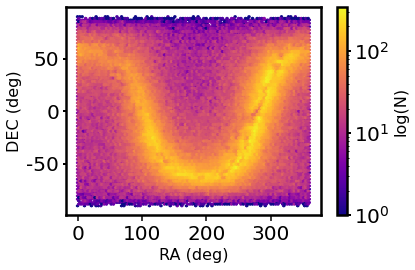

In [7]:
#----plot 1 Equatorial Coordinates------
p.figure()
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot

PLT= p.hexbin(T['ra'],T['dec'],bins='log', mincnt=1,cmap='plasma') #create a hexbin/2d histogram of ra,dec with log bins. 
#in the above mincnt = 1 means there must be at least 1 star in the bin!
p.colorbar(PLT,label='log(N)') #add the colorbar to the hexbin defined as PLT
p.xlabel('RA (deg)') #Ra x label
p.ylabel('DEC (deg)') # dec y label
p.tight_layout() #remove white spaces

#--------

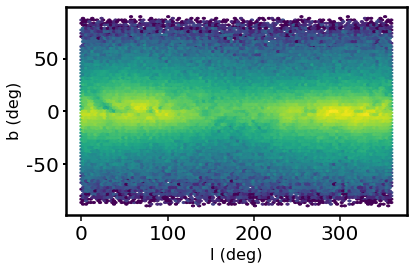

In [8]:
#----plot 2------ 
#plot of galatic coloumns (l and b)
p.figure()
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot
p.hexbin(T['l'],T['b'],bins='log', mincnt=1,cmap='viridis') 
p.xlabel('l (deg)') #Ra x label
p.ylabel('b (deg)') #
p.tight_layout()

#--------

Lets now compute the distance distribution

## Plot the Distance Distribution

First compute the heliocentric distances to each star then plot a histogram of the distance distribution using 50 bins.

After which compute the mean and median distances

In [19]:
# add solution here (10 pts)
#what do you want plotted? distance vs what?
#how to calculate heliocentric distance (do you take distance from earth aka gaia to sun is 1AU and the fact that we know distance from gaia to star?)
parallax = T['parallax']
heliocentric = (1000/parallax) #current parallax is in mas, convert to arcsec
print(heliocentric)

     parallax     
       mas        
------------------
1126.3920518184525
1717.5758677414717
1060.4109948727541
 668.4071733053017
 467.0544802358346
 1759.595778095916
               ...
1979.8093915473594
1243.3028245379764
 995.1990921651474
 292.7653846605972
1888.5041931381008
 742.5431267615837
1094.8624066170564
Length = 513123 rows


In [20]:
a= np.mean(heliocentric)
print('The mean distance is', a,'pc.')
b = np.median(heliocentric)
print('The median distance is' , b,'pc.')

The mean distance is 1362.1670990488908 pc.
The median distance is 1194.0580414131507 pc.


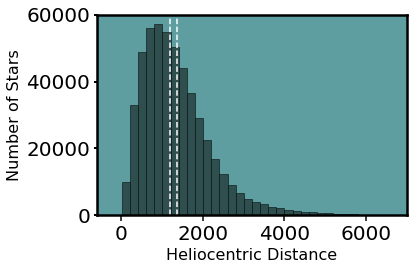

In [21]:
p.figure()#facecolor='black'
p.hist(heliocentric,bins=50,histtype="bar",color='darkslategrey',edgecolor='black',linewidth=.5) #histtype=step
#fig.patch.set_facecolor('blue') #how do you set background to black?
ax = p.gca()
ax.set_facecolor('cadetblue')
#cm = p.cm.get_cmap('plasma')
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot
p.xlabel('Heliocentric Distance') #Ra x label
p.ylabel('Number of Stars') 
p.xlim([-600,7000])
p.axvline(x=a,ls='--',color='white',label="mean",linewidth=1.5)
p.axvline(x=b,ls='--',color='white',label='median',linewidth=1.5)
#ax=p.axes()
# Set color
#ax.set_facecolor('pink')
p.tight_layout()

## Create the First Color Magnitude Diagram

With the color and magnitude already in the table, lets now plot our first (raw) color (bp-rp) magnitude (absolute G magnitude) diagram. Since there are 500,000 points, use a 2-D histogram to make this plot. Don't forget to invert the y-axis since magnitudes go in the opposite direction.


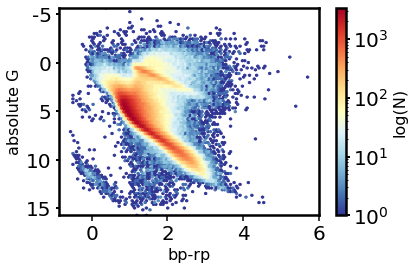

In [26]:
# add solution here (5 pts)
#----plot 3----- 
#plot of galatic coloumns (l and b)
p.figure()
xx = 1000/T['parallax']
aa = T['phot_g_mean_mag'] - 5. * np.log10(xx/10) 
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot
p.hexbin(T['bp_rp'],aa,bins='log', mincnt=1,cmap='RdYlBu_r') 
p.xlabel('bp-rp') #Ra x label
p.ylabel('absolute G') #
p.ylim(max(a), min(a))
p.colorbar(label='log(N)') #add the colorbar to the hexbin defined as PLT
p.tight_layout()

#--------

Now that we have computed the color and absoulute magnitude lets now plot our first CMD!

## Create the Second (de-reddend) Color Magnitude Diagram
With the first (raw) color and magnitude in hand, lets now plot our second color magnitude diagram that has been corrected for reddening and extinction. Since there are 500,000 points, use a 2-D histogram to make this plot. Don't forget to invert the y-axis since magnitudes go in the opposite directon

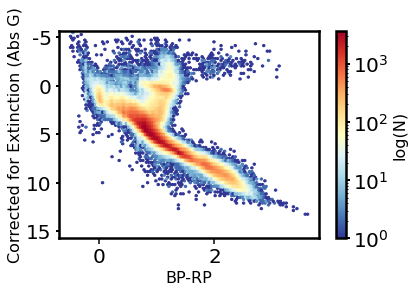

In [27]:
# add solution here (5 pts)
#----plot 3----- 
#plot of galatic coloumns (l and b)
p.figure()
x = 1000/T['parallax']
a = T['phot_g_mean_mag'] - 5. * np.log10(x/10) 
c = a- T['ag_gspphot'] 
b = T['bp_rp'] - T['ebpminrp_gspphot']
#we will use hexbin which creates hexagonal bins and the color in each bin represents the number of stars in that bin
#bins='log' will define logarthimic bins; mincnt = defined the min count to plot
p.hexbin(b,c,bins='log', mincnt=1,cmap='RdYlBu_r') 
p.xlabel('BP-RP') #Ra x label
p.ylabel('Corrected for Extinction (Abs G)') 
p.ylim(max(a), min(a))
p.colorbar(label='log(N)') #add the colorbar to the hexbin defined as PLT
p.tight_layout()

#--------

## Create the Final (low extinction) Color Magnitude Diagram
Lets now select only those stars where the color excess is low E(BP-RP) < 0.05mag.

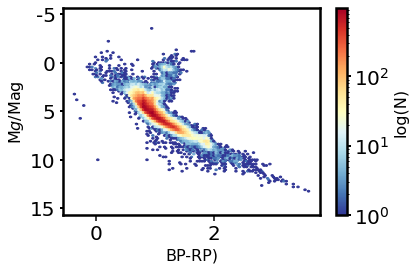

In [28]:
ebrp = T['ebpminrp_gspphot']
low = np.where(ebrp<0.05)
bprp = T['bp_rp'] 
absmag = T['phot_g_mean_mag'] - 5. * np.log10(x/10) 


p.hexbin(bprp[low],absmag[low],bins='log', mincnt=1,cmap='RdYlBu_r') 
p.xlabel('BP-RP)') #Ra x label
p.ylabel('M$g$/Mag') #
p.ylim(max(a), min(a))
p.colorbar(label='log(N)') #add the colorbar to the hexbin defined as PLT

p.tight_layout()


## Answer these Qs (6 pts)
**Q1: Are the stars located in one particular direction or all around the sky?**

A1: The stars are located all around the sky as noted by the plots of both equitorial and galactic coordinates.

**Q2: What is the mean distance to the stars in the sample (in pc) :**

A2 : The mean distance is 1362.1670990488908 pc. 

**Q3: What is the median distance to the stars in the sample (in pc):**

A3: The median distance is 1194.0580414131507 pc.

**Q4: Are the median and mean the same? Why or why not?**

A4: No, they are not the same. The mean is higher which makes me think that there are some outliers aka stars that are super far away. Median is by definition the number separating the higher half of a sample from the lower half, so the median being lower than mean means that the middle most number in the range is drastrically different to the highest number in the range. 

**Q5: The de-reddened and low extinction Color magnitude diagrams should look similar! Do they? If not, why not?**

A5: They look basically the same because they go hand-in-hand. Dust clouds along the line of sight scatter and absorb light coming from distant objects. We therefore see these objects as dimmer and redder than they really are. These effects are known as extinction and interstellar reddening respectively. As you can see, de-redding and low extinction are bascially the same thing but just in different terminology.


**Q6: How many of these stars are observable (with altitude > 40) from McDonald Observatory (lat, long = 30.6797° N, 104.0247° W)? How do you know?**

A6: There are 181,842 stars in the observable with altitude > 40 degrees.


In [25]:
# add solution here (4 pts)
alt_N = 180-(90-30.6797) +T['dec']
alt_S = (90-30.6797) +T['dec']
Num_stars = len(np.where( ((alt_N >= 40) & (alt_N <= 90)) | ((alt_S >= 40) & (alt_S <= 40))  )[0])
print('There %i stars that are observable with altitude > 40 degrees'%Num_stars)

There 181842 stars that are observable with altitude > 40 degrees
